In [1]:
import numpy
from matplotlib import pyplot
import py_monte_carlo
import scipy.sparse
import scipy.linalg

In [2]:
side_len = 5
nvars = side_len*side_len

x = numpy.arange(side_len)
y = x
X, Y = numpy.meshgrid(x, y)

INDX = Y*side_len + X
RIGHT = Y*side_len + (X+1)%side_len
BOT = (((Y+1) % side_len )*side_len + X)

right_edges = [((a, b), 1.0) for a, b in zip(INDX.flatten(), RIGHT.flatten())]
bot_edges = [((a, b), 1.0) for a, b in zip(INDX.flatten(), BOT.flatten())]

In [4]:
edges =  right_edges + bot_edges

transverse = 0.1
beta = 10.0

graph = py_monte_carlo.Lattice(edges)
graph.set_transverse_field(transverse)

In [5]:
correlation = numpy.asarray(graph.run_quantum_monte_carlo_and_measure_bond_autocorrelation(beta, 1000, 1)[0])

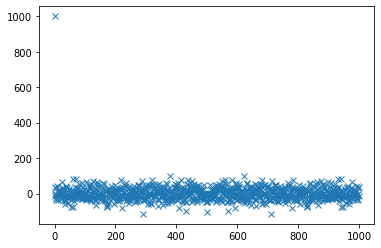

In [6]:
pyplot.plot(list(correlation), 'x')